* Author: Julia Moran
* Major: Computer Science
* Creation Date: April 15, 2022
* Due Date: April 22, 2022
* Course: CSC223
* Professor Name: Prof. Earl
* Assignment: 5
* Filename: main.ipynb
* Purpose: This notebook reads in a csv file of data from IMDB about movies and plots the normalized distribution of the movies' ratings as a histogram and bell curve. It also will plot the top ten movies' amounts of votes as a bar graph.

In [2]:
%matplotlib inline

# STUDENT TODO: Write statements to import numpy, pandas, & matplotlib.pyplot
# following conventions. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# STUDENT: Do not modify the code in this cell. 

def norm_dist(x, mean, std):
    '''
        Use this function to calculate a normal distribution
        
        Parameters:
            x - 1D Array of Distribution
            mean - The mean of the dataset
            std - The standard deviation of the dataset
            
        Return:
            A numpy array
    '''
    from scipy.stats import norm
    return norm.pdf(x, mean, std)
    

# Import the dataset
movies = pd.read_csv('https://faculty.kutztown.edu/earl/teaching/2021-2022/223-adv-sci-program/hw/materials/movies.csv', index_col=0)
movies.head()

,title,year,length,budget,rating,votes,r1,r2,r3,r4,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
1,$,1971,121,NaN,6.4,348,4.5,4.5,4.5,4.5,...,4.5,4.5,NaN,0,0,1,1,0,0,0
2,$1000 a Touchdown,1939,71,NaN,6.0,20,0.0,14.5,4.5,24.5,...,4.5,14.5,NaN,0,0,1,0,0,0,0
3,$21 a Day Once a Month,1941,7,NaN,8.2,5,0.0,0.0,0.0,0.0,...,24.5,24.5,NaN,0,1,0,0,0,0,1
4,"$40,000",1996,70,NaN,8.2,6,14.5,0.0,0.0,0.0,...,34.5,45.5,NaN,0,0,1,0,0,0,0
5,"$50,000 Climax Show, The",1975,71,NaN,3.4,17,24.5,4.5,0.0,14.5,...,0.0,24.5,NaN,0,0,0,0,0,0,0


In [4]:
#TUDENT TODO: Code for Figure 1
    
#Calculate the mean and standard and deviation of the ratings
mean = movies['rating'].mean()
standardDeviation = movies['rating'].std()

In [5]:
#Set the x and y values for the bell curve by using the normal distribution formula
x = np.linspace(0, 11)
y = norm_dist(x, mean, standardDeviation)

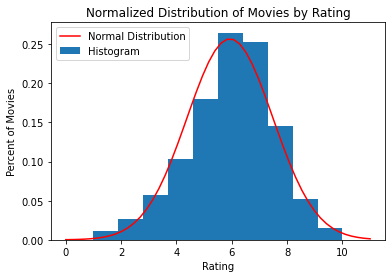

In [6]:
#Plot the histogram of the ratings
plt.hist(movies['rating'], bins = 10, density = True, label = "Histogram")

#Plot the normal distribution of the ratings
plt.plot(x, y, color = 'red', label = "Normal Distribution")

#Plot the labels, title, and legend of the figure
plt.xlabel("Rating")
plt.ylabel("Percent of Movies")
plt.title("Normalized Distribution of Movies by Rating")
plt.legend()

In [7]:
# STUDENT TODO: Code for Figure 2

#Initialize the arrays for the top ten movie titles and vote counts
topNames = np.array([])
topVotes = np.array([])

In [8]:
#Get the titles and number of votes for the top ten highest voted movies
for i in range(10):
    #Get the movie with the current highest votes
    maximum = movies['votes'].max()
    topMovies = movies[movies['votes'] == maximum]
    
    #Get the index of the movie with the current highest votes
    topIndices = list(movies.index[movies['votes'] == maximum])
    
    #Add the movie with the highest amount of votes to the arrays for the top ten movie titles and vote counts 
    topNames = np.append(topNames, topMovies['title'])
    topVotes = np.append(topVotes, topMovies['votes'])

    #Add the titles to a new series with the index as the number of votes each movie has
    topTen = pd.Series(topNames, index = topVotes)
    
    #Remove the movie with the highest amount of votes from the data frame
    movies = movies.drop(labels = topIndices, axis = 0)

Text(0.5, 1.0, 'Top Ten Movies by Votes')

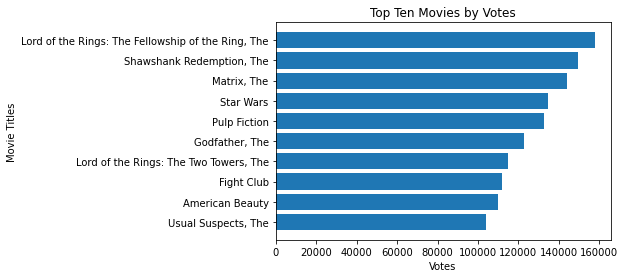

In [9]:
#Reverse the order of the new series so that the highest voted movie is at the top of the bar graph
topTen = topTen.iloc[::-1]

#Plot the titles and votes of the top ten movies in the dataframe
plt.barh(topTen.values, topTen.index)

#Plot the labels and title of the bar graph
plt.xlabel('Votes')
plt.ylabel('Movie Titles')
plt.title('Top Ten Movies by Votes')